<a href="https://colab.research.google.com/github/M-Divya29/Classifying-Cryptocurrencies-by-Market-Capitalization/blob/main/Cryptocurrencies_by_Market_Capitalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

id                100
market_cap_usd    100
dtype: int64
id                100
market_cap_usd    100
dtype: int64
             id  market_cap_usd
0       bitcoin    284909052105
1        ripple    119207709132
2      ethereum    100115499075
3  bitcoin-cash     44424061657
4       cardano     25916647856
5      litecoin     16574020942
6           nem     14813369998
7       stellar     12634630726
8          tron     11741640953
9          iota     11143859582


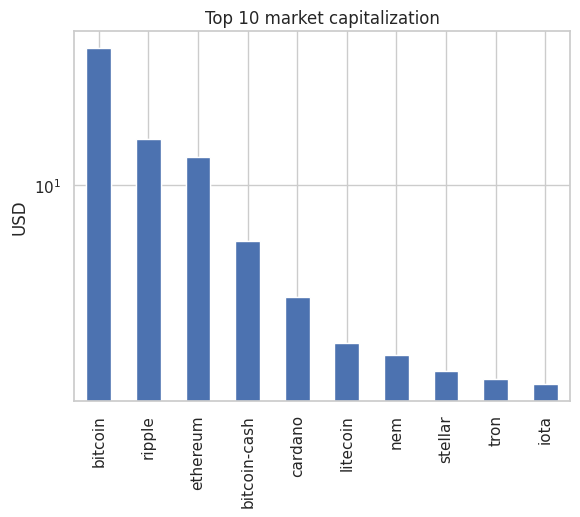

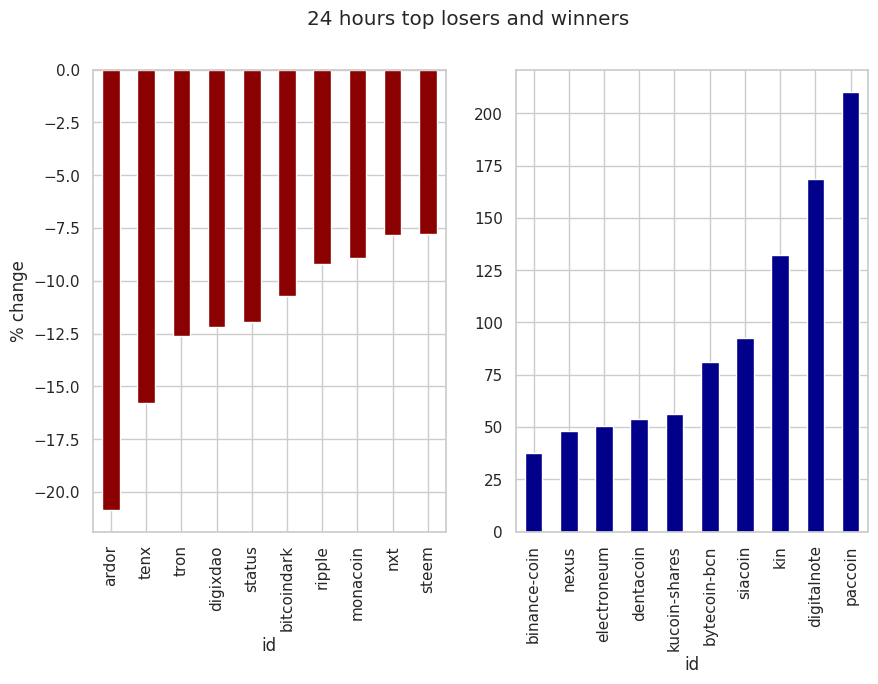

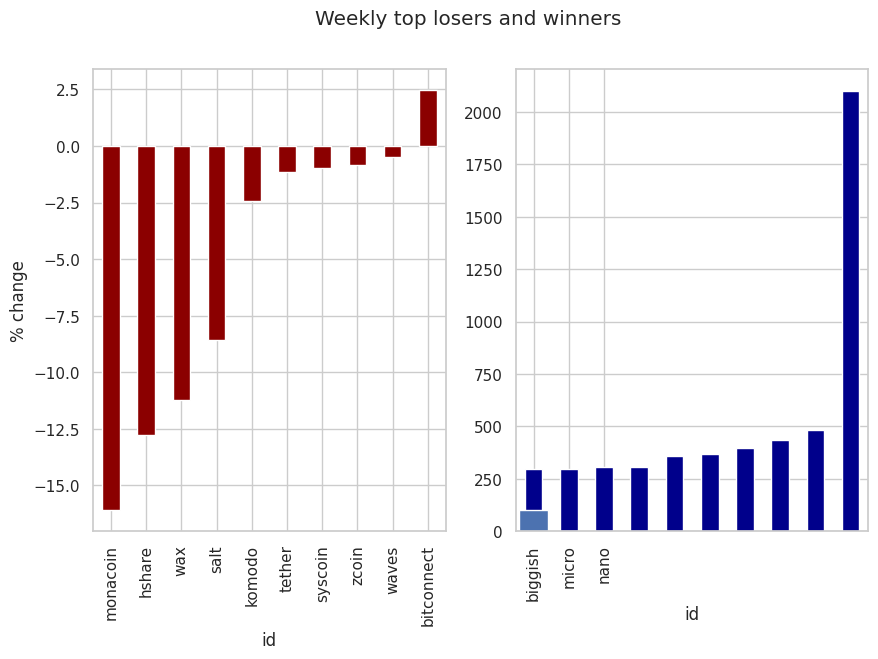

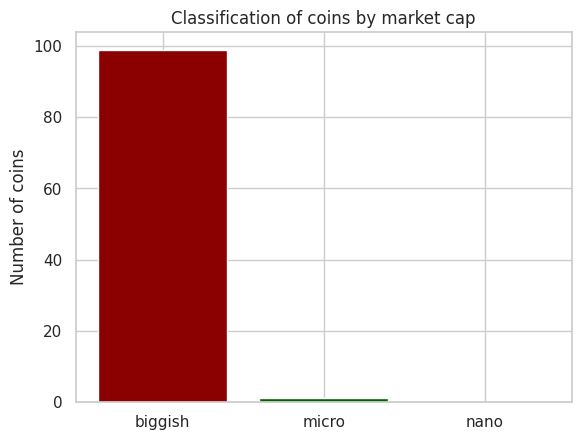

In [16]:
# Reading datasets/coinmarketcap_06122017.csv into pandas
import pandas as pd
dec6 = pd.read_csv("coinmarketcap_06012018.csv")
# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id', 'market_cap_usd']]
# Counting the number of values
print(market_cap_raw.count())

# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')
# Counting the number of values again
print(cap.count())

#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'
# Selecting the first 10 rows and setting the index
cap10 = cap.head(10).set_index('id')
# Calculating market_cap_perc
cap10=cap10.assign(market_cap_perc=lambda  x: (x.market_cap_usd / cap.market_cap_usd. sum()) *100)
# Plotting  the barplot with the title defined above
ax = cap10.market_cap_perc.head(10).plot.bar(title=TOP_CAP_TITLE)
# Annotating the y axis with the label defined above
ax.set_ylabel(TOP_CAP_YLABEL)

# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']
# Plotting market_cap_usd as before but adding the colors and scaling the y-axis
ax = cap10.market_cap_perc.head(10).plot.bar(title=TOP_CAP_TITLE, logy=True)
# Annotating the y axis with 'USD'
ax.set_ylabel('USD')
# Final touch! Removing the xlabel as it is not very informative
ax.set_xlabel('')

# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]
# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna()
# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values(['percent_change_24h'], ascending=True)
# Checking the first few rows
volatility.head()

#Defining a function with 2 parameters, the series to plot and the title
from matplotlib import pyplot as plt
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    # Plotting with pandas the barchart for the top 10 losers
    ax = (volatility_series[:10].plot.bar(color='darkred', ax=axes[0]))


    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)
    # Setting the ylabel to '% change'
    ax.set_ylabel("% change")
    # Same as above, but for the top 10 winners
    ax = (volatility_series[-10:].plot.bar(color='darkblue', ax=axes[1]))


# Returning this for good practice, might use later
    return fig, ax
DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

# Sorting in ascending order
volatility7d = volatility.sort_values(by='percent_change_7d', ascending=True)
WTITLE = "Weekly top losers and winners"
# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE)

# Selecting everything bigger than 10 billion
largecaps = cap.query('market_cap_usd > 10000000000')
# Printing out largecaps
print(largecaps)

# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D


def capcount(query_string):
    return cap.query(query_string).count().id
# Labels for the plot
LABELS = ["biggish", "micro", "nano"]
# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd > 300000000')
# Same as above for micro ...
micro = capcount('market_cap_usd > 50000000 and market_cap_usd < 300000000')
# ... and for nano
nano =  capcount('market_cap_usd < 50000000')
# Making a list with the 3 counts

values = [biggish, micro, nano]

# Plotting them with matplotlib
plt.bar(range(len(values)), values, tick_label=LABELS)
# Plotting them with matplotlib
fig, ax = plt.subplots()
nano_plt, micro_plt, biggish_plt = plt.bar([0, 1, 2], values, tick_label=LABELS)
nano_plt.set_facecolor('darkred')
micro_plt.set_facecolor('darkgreen')
biggish_plt.set_facecolor('darkblue')
ax.set_ylabel('Number of coins')
ax.set_title('Classification of coins by market cap')
plt.show()

In [43]:
!git config --global user.email "mdivyalalitha29@gmail.com"
!git config --global user.name "M-Divya29"

In [44]:
!git clone https://github.com/M-Divya29/Classifying-Cryptocurrencies-by-Market-Capitalization.git


fatal: destination path 'Classifying-Cryptocurrencies-by-Market-Capitalization' already exists and is not an empty directory.


In [29]:
%cd /content
!ls


/content
 Classifying-Cryptocurrencies-by-Market-Capitalization
 coinmarketcap_06012018.csv
'C:\Users\syam4\OneDrive\Documents\7th sem'
'C:\Users\syam4\OneDrive\Documents\7th sem\coinmarketcap_06012018.csv'
 README.md
 requirements.txt
 sample_data


In [30]:
!cp "/content/Classifying Cryptocurrencies by Market Capitalization.ipynb" \
"/content/Classifying-Cryptocurrencies-by-Market-Capitalization/"


cp: cannot stat '/content/Classifying Cryptocurrencies by Market Capitalization.ipynb': No such file or directory


In [31]:
!ls "/content/Classifying-Cryptocurrencies-by-Market-Capitalization"


Classifying-Cryptocurrencies-by-Market-Capitalization	     README.md
Classifying_Cryptocurrencies_by_Market_Capitalization.ipynb  requirements.txt
coinmarketcap_06012018.csv


In [32]:
%cd /content/Classifying-Cryptocurrencies-by-Market-Capitalization


/content/Classifying-Cryptocurrencies-by-Market-Capitalization


In [42]:
!git status


On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Classifying-Cryptocurrencies-by-Market-Capitalization/

nothing added to commit but untracked files present (use "git add" to track)


In [35]:
%cd /content/Classifying-Cryptocurrencies-by-Market-Capitalization
!ls


/content/Classifying-Cryptocurrencies-by-Market-Capitalization
Classifying-Cryptocurrencies-by-Market-Capitalization	     README.md
Classifying_Cryptocurrencies_by_Market_Capitalization.ipynb  requirements.txt
coinmarketcap_06012018.csv


In [41]:
!mv Classifying-Cryptocurrencies-by-Market-Capitalization/* .


mv: cannot stat 'Classifying-Cryptocurrencies-by-Market-Capitalization/*': No such file or directory


In [40]:
!ls


Classifying-Cryptocurrencies-by-Market-Capitalization	     README.md
Classifying_Cryptocurrencies_by_Market_Capitalization.ipynb  requirements.txt
coinmarketcap_06012018.csv


In [ ]:
!git add .


In [ ]:
!git commit -m "Added notebook, dataset and project files"


In [ ]:
!git push origin main
